* **Goal of the day:** Half-automatic phase-space calculation
* **Coder:** Paul Valcke

In [ ]:
# Pytest for the library if you made changes to the code
#!pytest "..\\..\\tests" -v --cov=chimes --cov-report html

In [2]:
# Importation without pip wheel installation : relative paths from notebook sections
#!pip install -r ../../requirements.txt # install necessary packages, comment once done

import sys
sys.path.insert(0,  "../../" )
import chimes as chm

In [3]:

# Basic everyday packages
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import plotly

# Improving display of tables
from IPython.display import display,HTML,Markdown
from IPython.display import IFrame
from itables import init_notebook_mode,options
options.columnDefs = [{"className": "dt-left", "targets": "_all"}]
options.classes="display nowrap compact"
options.scrollY="400px"
options.scrollCollapse=True
options.paging=False
pd.set_option('display.max_colwidth', None)
pd.set_option("display.colheader_justify","left")

# Interactive matplotlib figures, use plt.close('all') when too many are open
init_notebook_mode(all_interactive=True)
%matplotlib widget

## Tomas Mazak's workaround for Latex plotly rendering
import plotly.graph_objs as go
from IPython.display import display, HTML
plotly.offline.init_notebook_mode()
display(HTML('<script type="text/javascript" async src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.1/MathJax.js?config=TeX-MML-AM_SVG"></script>'))


<IPython.core.display.Javascript object>

In [3]:
chm.get_available_models()

Folder                     \
CHI                                           Core   
Climate_3Layers                               Core   
GK                                            Core   
E-CHIMES                                   ECHIMES   
E-CHIMES0                  ECHIMES\NotIncorporated   
_CESprod                   ECHIMES\NotIncorporated   
Attractor1D                               EXAMPLES   
Goodwin_example                           EXAMPLES   
Goodwin_example_short                     EXAMPLES   
Lorenz_Attractor                          EXAMPLES   
PDE-Diffusion                             EXAMPLES   
TUTORIAL                                  EXAMPLES   
_EXTERNALCOUPLING                        Extension   
GEMMES_Coping2018                           Gemmes   
3Capital                                      ICED   
ICED                                          ICED   
Aizawa_Attractor                     Miscellaneous   
Halvorsen_Attractor                  Miscellaneous   
Rossler_Attractor                    Miscellaneous   
stochastic                           Miscellaneous   
_EXTERNALCOUPLING_Matter             Miscellaneous   
Agents_Vicsek                 Miscellaneous\Agents   
DoublePendulum            Miscellaneous\Attractors   
PDE-Waves                                  Spatial   

                         Short Documentation                                                            \
CHI                                                             Human-Capital Instability: Causal core   
Climate_3Layers                       This is a 3-Layer CLimate model, that gives temperature anomaly.   
GK                                               Goodwin-Keen model: savings-investment dynamics with    
E-CHIMES                                                        Economic Core for multisectoral models   
E-CHIMES0                                                       Economic Core for multisectoral models   
_CESprod                                                        Transform production function to a CES   
Attractor1D                                Stochastic movement in a two-relative equilibrium potential   
Goodwin_example                                  A Goodwin model of an economy. Independant model file   
Goodwin_example_short                                             Goodwin model with minimal formalism   
Lorenz_Attractor                                           Lorenz Chaotic Attractor: Butterfly effect!   
PDE-Diffusion                          Spatial Diffusion Dynamics using Partial differential equations   
TUTORIAL                  Highly commented Template to write your model. This is the short description   
_EXTERNALCOUPLING                                 Homemade API for external coupling, on a dummy model   
GEMMES_Coping2018                                                          GEMMES 2018 : GK + Climate    
3Capital                     Energy (Green-Brown) + Output (Grey) Capital model with market allocation   
ICED                                                                 Inequality-Carbon-Energy-Dynamics   
Aizawa_Attractor                                                              Aizawa Chaotic Attractor   
Halvorsen_Attractor                                                        Halvorsen Chaotic Attractor   
Rossler_Attractor                                                            Rossler Chaotic Attractor   
stochastic                                                                        Stochastic dynamics    
_EXTERNALCOUPLING_Matter                   Template to write your model. This is the short description   
Agents_Vicsek                                                                 Movement synchronization   
DoublePendulum                                                Double Uniform Pendulum Chaotic Dynamics   
PDE-Waves                                         Wave propagation with convection and diffusion in 1D   

                       

### Manual approach on Haizawa Attractor: a slice in the middle 

Relevant domain : 
* x = [-1.5,1.5]
* y = [-1.5,1.5]
* z = [0,2.5], centered 1.25


time step 2000 / 2000


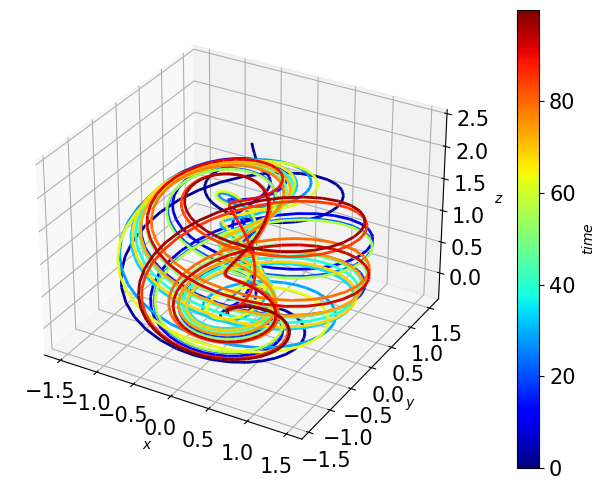

In [30]:
import numpy as np 
import matplotlib.pyplot as plt 
hub=chm.Hub('Aizawa_Attractor')
hub.set_fields(dt=0.05)
hub.run()
chm.Plots.XYZ(hub,'x','y','z')

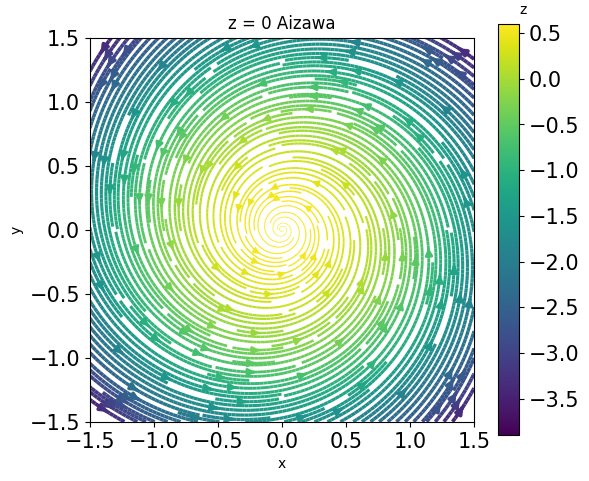

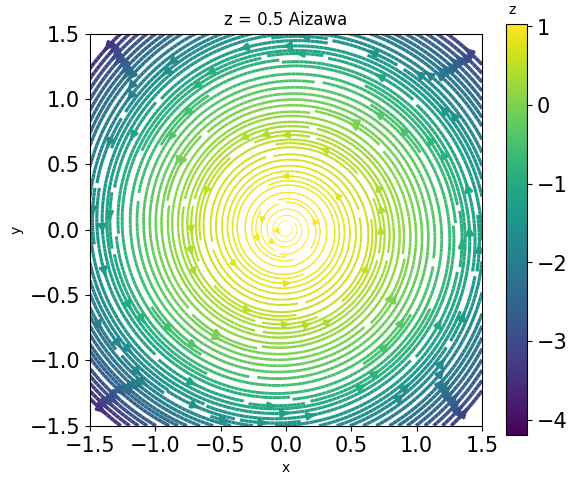

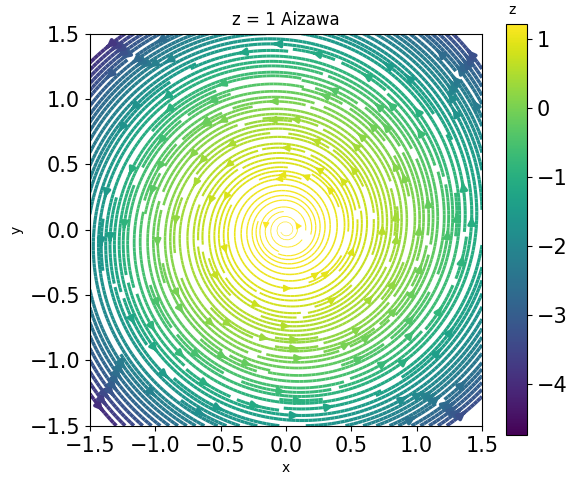

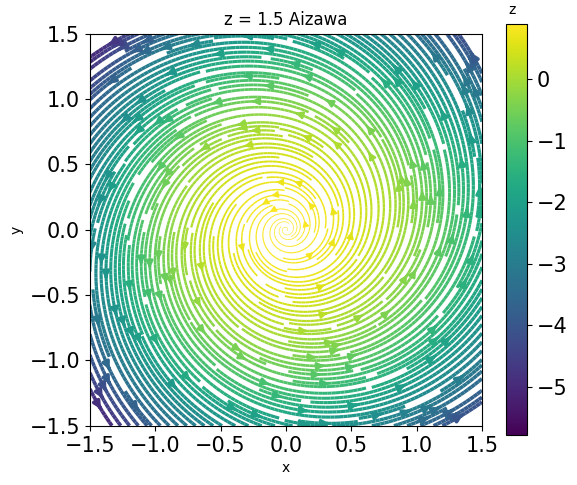

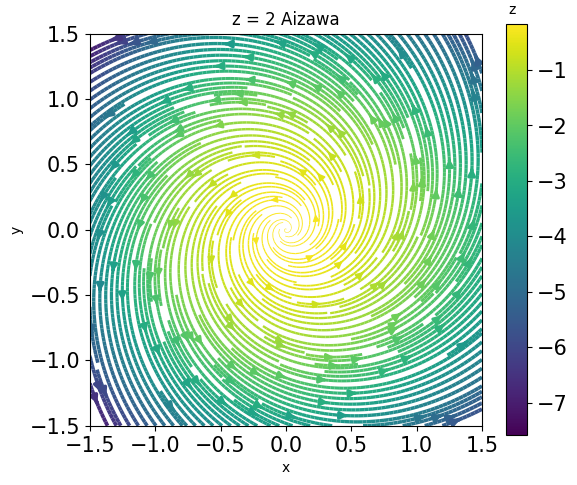

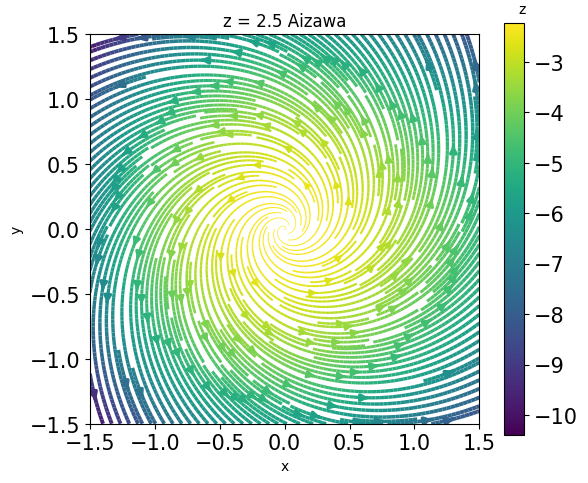

In [19]:
#hub.set_fields(x=0.1,y=0.15,z=1.25)
plt.close('all')
%matplotlib inline

for z in [0,.5,1,1.5,2,2.5]:

    hub=chm.Hub('Aizawa_Attractor') 
    hub.set_fields(z=z)
    ### Input
    x='x'
    y='y'
    xlim = [-1.5,1.5]
    ylim = [-1.5,1.5]
    color='z' #_angle2D'
    nx = 50
    ny = 50
    satspeed = 2
    returnFig = False
    title = f'z = {z} Aizawa'
    density=3

    X,Y = np.meshgrid(np.linspace(xlim[0],xlim[1],nx),  
                    np.linspace(ylim[0],ylim[1],ny)) 
    X=X.reshape(-1)
    Y=Y.reshape(-1)

    #### 
    hub.set_fields(**{'Tsim':0.01,'dt':0.01,'nx':len(X),x:X,y:Y})
    R=hub.get_dfields()
    defaultval={k:R[k]['value'] for k in R.keys()}
    #defaultval[x]=X
    #defaultval[y]=Y

    dXdt = R[x]['func'](**{k:v for k,v in defaultval.items() if k in R[x]['kargs']})
    dYdt = R[y]['func'](**{k:v for k,v in defaultval.items() if k in R[y]['kargs']})

    if color != '_angle': 
        vcolor = R[color]['func'](**{k:v for k,v in defaultval.items() if k in R[color]['kargs']})
        z= vcolor 
        XY = (dXdt**2 + dYdt**2 )**(1/(2*satspeed))
        vcolor= np.atan2(z,XY)
    else:
        vcolor = np.arctan2(dYdt,dXdt)
        
    X= np.reshape(X,(nx,ny))
    Y= np.reshape(Y,(nx,ny))
    dXdt= np.reshape(dXdt,(nx,ny))
    dYdt= np.reshape(dYdt,(nx,ny))
    vcolor = np.reshape(vcolor,(nx,ny))

    lw = (dXdt**2 + dYdt**2 )**(1/(2*satspeed))

    fig = plt.figure(z)
    fig.set_figwidth(6)
    fig.set_figheight(5)
    strm =plt.streamplot(X, Y, dXdt, dYdt, density=density, color=vcolor, linewidth=lw)
    cb = fig.colorbar(strm.lines)
    cb.set_label(color, labelpad=-40, y=1.05, rotation=0)

    plt.xlabel(x)
    plt.ylabel(y)
    plt.axis('scaled')
    plt.title(title)
    plt.tight_layout()
    plt.show()

In [21]:
!pip install imageio

     -------------------------------------- 313.5/313.5 kB 2.2 MB/s eta 0:00:00


In [40]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import imageio.v2 as imageio
import os

# Create a directory to save frames
os.makedirs('frames', exist_ok=True)

# Custom colormap from blue to red centered on zero
cmap = plt.get_cmap('coolwarm')
norm = mcolors.TwoSlopeNorm(vmin=-np.pi/2, vcenter=0, vmax=np.pi/2)

for z in np.arange(-.5,2.5,0.02):
    hub = chm.Hub('Aizawa_Attractor') 
    hub.set_fields(z=z)
    
    x = 'x'
    y = 'y'
    xlim = [-2, 2]
    ylim = [-2, 2]
    color = 'z'
    nx = 50
    ny = 50
    satspeed = 2
    density = 1
    title = f'z = {z:.2f} Aizawa'

    X, Y = np.meshgrid(np.linspace(xlim[0], xlim[1], nx),  
                       np.linspace(ylim[0], ylim[1], ny)) 
    X = X.reshape(-1)
    Y = Y.reshape(-1)

    hub.set_fields(**{'Tsim': 0.01, 'dt': 0.01, 'nx': len(X), x: X, y: Y})
    R = hub.get_dfields()
    defaultval = {k: R[k]['value'] for k in R.keys()}

    dXdt = R[x]['func'](**{k: v for k, v in defaultval.items() if k in R[x]['kargs']})
    dYdt = R[y]['func'](**{k: v for k, v in defaultval.items() if k in R[y]['kargs']})

    if color != '_angle': 
        #vcolor = R[color]['func'](**{k: v for k, v in defaultval.items() if k in R[color]['kargs']})
        vcolor = R[color]['func'](**{k:v for k,v in defaultval.items() if k in R[color]['kargs']})
        
        XY = (dXdt**2 + dYdt**2 )**(1/(2*satspeed))
        vcolor= np.arctan2(vcolor,XY)   
   
    else:
        vcolor = np.arctan2(dYdt, dXdt)
        
    X = np.reshape(X, (nx, ny))
    Y = np.reshape(Y, (nx, ny))
    dXdt = np.reshape(dXdt, (nx, ny))
    dYdt = np.reshape(dYdt, (nx, ny))
    vcolor = np.reshape(vcolor, (nx, ny))

    lw = (dXdt**2 + dYdt**2 )**(1/(2*satspeed))

    fig, ax = plt.subplots(figsize=(6, 5))
    strm = ax.streamplot(X, Y, dXdt, dYdt, density=density, color=vcolor, linewidth=lw, cmap=cmap, norm=norm)
    cb = fig.colorbar(strm.lines)
    cb.set_label('vertical angle', labelpad=-40, y=1.05, rotation=0)

    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_aspect('equal')
    ax.set_title(title)
    plt.tight_layout()

    # Save the frame
    frame_filename = f'frames/frame_{z}.png'
    plt.savefig(frame_filename)
    plt.close(fig)



In [41]:

# Create a GIF
images = []
for z in np.arange(-1,2.5,0.05):
    frame_filename = f'frames/frame_{z}.png'
    images.append(imageio.imread(frame_filename))

gif_filename = 'Aizawa_Attractor.gif'
imageio.mimsave(gif_filename, images, duration=2, loop=0)


In [ ]:

from chimes.plots.tools._plot_tools import _indexes, _key
from typing import Union, List, Tuple

def PhaseSpace(
    hub,
    x:str = 'omega',
    y:str = 'employment',
    width:str = '_speed',
    color:Union[str,bool] = 'g',
    xlim:list[int,int] = [0,.99],
    ylim:list[int,int] = [0,.99],
    title:bool='Test',
    idx=0,
    Region=0,
    tini=False,
    tend=False,
    returnFig=False):
    ''' 
    Docstring
    '''    
    
    R = hub.get_dfields()
    
    hub, idx, Region, idt0, idt1 = _indexes(hub, idx, Region, tini, tend)
    x, xsect, xname = _key(R, x)
    y, ysect, yname = _key(R, y)
    
    if color:
        color, csect, cname = _key(R, color)
    
    X,Y = np.meshgrid(np.linspace(xlim[0],xlim[1],30), #OMEGA   
                np.linspace(ylim[0],ylim[1],30)) #EMPLOYMENT
    X.reshape(-1)
    Y.reshape(-1)

    ################    
        
    ################
    


In [ ]:
hub=chm.Hub('Lorenz_Attractor')

In [ ]:

def __slices_wholelogic(hub, key='', axes=[[]], N=100, tid=0, idx=0,Region=0):
    '''
    Take the logic of a field, and calculate a slice given two of the argument fields that are modified

    Example :
        plotfunction(hub,key='Hid',axes=[['Omega',0,2]],N=100,tid=0,idx=0)
        plotfunction(hub,key='Hid',axes=[['Omega',0,2],['x',0,100]],N=100,tid=0,idx=0)

    Parameters
    ----------
    key  : str. name of the field you are introspecting
    axes : [[str,valmin,valmax]] or [[str,valmin,valmax],[str,valmin,valmax]] for 2D
    N    : int, number of points in grid
    tid  : index of
    idx : TYPE, optional
        DESCRIPTION. The default is 0.

    Raises
    ------
    Exception
        DESCRIPTION.

    Returns
    -------
    None.
    '''

    R = hub.get_dparam()

    if len(axes) > 2:
        raise Exception('Too many dimensions to plot !')
    elif len(axes) == 2:
        axx = axes[0]
        axy = axes[1]

        ## If the axes contains a sector
        if len(axx)==4: RegionX=axx[1]
        else : RegionX=0
        if len(axy)==4: RegionY=axy[1]
        else : RegionY=0

        ### CREATE THE GRID
        XX, YY = np.meshgrid(np.linspace(axx[-2], axx[-1], N),
                             np.linspace(axy[-2], axy[-1], N))


        keys = [axes[0][0], axes[1][0]]
        defaultkeys = [k for k in R[key]['kargs'] if k not in keys]

        defaultval = {k: R[k]['value'] for k in defaultkeys if k in hub.dmisc['parameters']}
        defaultval.update({k: R[k]['value'][tid, idx,Region,:,0]
                          for k in defaultkeys if k in hub.dmisc['dfunc_order']['statevar']})
        defaultval0 = copy.deepcopy(defaultval)
        defaultval[keys[0]][:,RegionX] = XX
        defaultval[keys[1]][:,RegionY] = YY

        Z = R[key]['func'](**defaultval)

        plt.figure(f'Function: {key} 2D')
        plt.pcolormesh(XX, YY, Z, cmap='jet')
        plt.xlabel(R[axes[0][0]]['symbol'])
        plt.ylabel(R[axes[1][0]]['symbol'])
        plt.title(R[key]['symbol']+f'\n {defaultval0}')
        plt.colorbar()
        plt.show()
    elif len(axes) == 1:
        XX = np.linspace(axes[0][1], axes[0][2], N)
        if len(axes[0])==4: RegionX=axes[0][1]
        else : RegionX=0

        defaultkeys = [k for k in R[key]['kargs'] if k not in [key]]

        defaultval = {k: R[k]['value'] for k in defaultkeys if k in hub.dmisc['dfunc_order']['parameters']}

        defaultval.update({k: R[k]['value'][tid, idx,Region,:,0]
                          for k in defaultkeys if k in hub.dmisc['dfunc_order']['statevar']})
        defaultval0 = copy.deepcopy(defaultval)

        defaultval[axes[0][0]][:] = XX

        Z = R[key]['func'](**defaultval)

        plt.figure(f'Function: {key} 1D')
        plt.plot(XX, Z)
        plt.xlabel(R[axes[0][0]]['symbol'])
        plt.ylabel(R[key]['symbol'])
        plt.title(f'{defaultval0}')
        plt.show()


def __plot_variation_rate(hub, varlist, title='', idx=0):
    '''
    Allow one to observe the time variation and the contribution of each dependency.
    Useful for debugging or understanding where are the main loops

    THE SYSTEM NEEDS :
        1) a run
        2) calculate_variation_rate

    for each field in varlist (ex : ['Y','L','w']) it will :
        * Print the variable time evolution
        * Print its relative growth rate
        * if it is a Statevar, its time derivate, and the contribution of each of its dependency to its time derivate
        * if it is an ODE, its second time derivate and the contribution of each of its dependency
    '''
    R = hub.get_dparam()

    fig = plt.figure()
    fig.set_size_inches(15, 5*len(varlist))
    t = R['time']['value'][:, 0]
    gs = GridSpec(len(varlist), 3)

    # Axis for value and relative growth
    ax0 = {key: fig.add_subplot(gs[i, 0]) for i, key in enumerate(varlist)}
    ax02 = {key: ax0[key].twinx() for key in varlist}

    # Axis for derivative and their contributions
    ax = {key: fig.add_subplot(gs[i, 1:]) for i, key in enumerate(varlist)}

    for key in varlist:
        # ##################################
        # Left Curves (y, relative growth)
        ax02[key].plot(t, R[key]['value'][:, idx], c='b')
        ax0[key].plot(t[1:-1], R[key]['time_log_derivate'][1:-1, idx], ls='--', c='g')
        ax0[key].axhline(y=0, color='k', lw=0.5)

        # Ylim management
        sort = np.sort(R[key]['time_log_derivate'][1:-1, idx])[int(0.05*len(t)):-int(0.05*len(t))]
        ax0[key].set_ylim([1.3*np.nanmin(sort), 1.3*np.nanmax(sort)])
        # Left side axis management
        ax02[key].set_ylabel(R[key]['symbol'])
        ax02[key].spines['left'].set_position(('outward',  80))

        ax02[key].yaxis.tick_left()
        ax02[key].yaxis.set_label_position('left')
        ax02[key].spines['left'].set_color('blue')
        ax02[key].tick_params(axis='y', colors='blue')
        symb = R[key]['symbol'].replace('$', '')
        label = r'$\dfrac{\dot{'+symb+r'}}{'+symb+'}$'
        ax0[key].spines['left'].set_color('green')
        ax0[key].tick_params(axis='y', colors='green')
        ax0[key].set_ylabel(label)

        # ##################################
        # Right side (Derivates)

        # Full curve
        if R[key]['eqtype'] == 'ode':
            ax[key].plot(t[2:-2], R[key]['time_dderivate'][2:-2, idx],
                         c='black', label=r'$\dfrac{d^2 '+symb+r'}{dt^2}$')
            label = r'$\ddot{'+R[key]['symbol'].replace('$', '')+r'}$'
        else:
            ax[key].plot(t[1:-1], R[key]['time_derivate'][1:-1, idx],
                         c='black', label=r'$\dfrac{d '+symb+r'}{dt}$')
            label = r'$\dot{'+R[key]['symbol'].replace('$', '')+r'}$'
        ax[key].spines['right'].set_color('black')
        ax[key].axhline(y=0, color='k', lw=0.5)

        #  Contribution
        vv = R[key]['partial_contribution']
        for i, k2 in enumerate(vv.keys()):
            symb2 = R[k2]['symbol'].replace('$', '')
            if R[key]['eqtype'] == 'ode':
                lab = r'$\dfrac{\partial \dot{'+symb+r'}}{\partial '+symb2+'}\dot{'+symb2+r'}$'
            else:
                lab = r'$\dfrac{\partial '+symb+r'}{\partial '+symb2+'}\dot{'+symb2+r'}$'
            ax[key].plot(t[1:-1], vv[k2][1:-1, idx],
                         label=lab)

        # Axis management
        ax[key].yaxis.tick_right()
        ax[key].yaxis.set_label_position('right')
        ax[key].set_ylabel(label)
        ax[key].legend()

    # Figure management
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle(title)
    plt.show() 